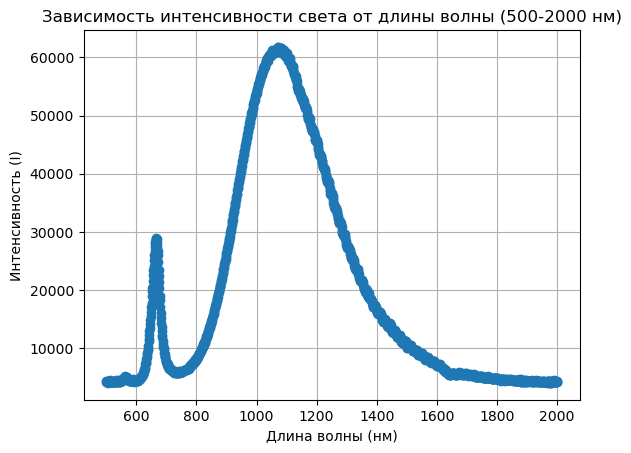

In [6]:
import matplotlib.pyplot as plt

# Считываем данные из файла
filename = "data/sp_00000000.sp"
data = {"nm": [], "I": []}
with open(filename, 'r') as file:
    for line in file:
        if line.startswith('#'):
            continue
        values = line.split()
        nm = float(values[0])
        if 500 <= nm <= 2000:  # Ограничиваем диапазон длин волн
            data["nm"].append(nm)
            data["I"].append(float(values[1]))

# Строим график
plt.plot(data["nm"], data["I"], marker='o', linestyle='-')
plt.xlabel('Длина волны (нм)')
plt.ylabel('Интенсивность (I)')
plt.title('Зависимость интенсивности света от длины волны (500-2000 нм)')
plt.grid(True)
plt.show()

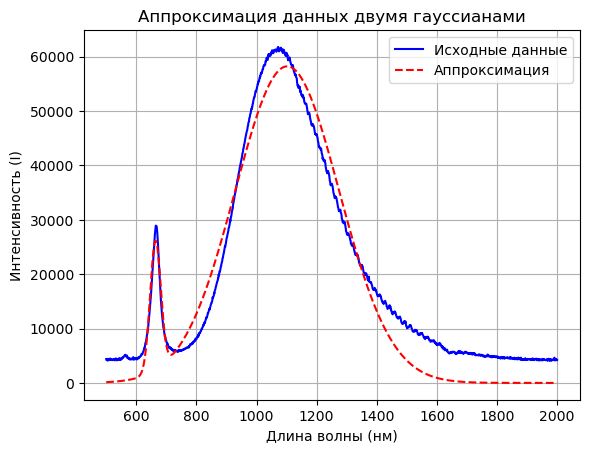

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Функция для двух гауссиан
def double_gaussian(x, A1, B1, C1, A2, B2, C2):
    return A1 * np.exp(-(x - B1)**2 / (C1**2)) + A2 * np.exp(-(x - B2)**2 / (C2**2))

# Считываем данные из файла
filename = "data/sp_00000000.sp"
data = {"nm": [], "I": []}
with open(filename, 'r') as file:
    for line in file:
        if line.startswith('#'):
            continue
        values = line.split()
        nm = float(values[0])
        if 500 <= nm <= 2000:  # Ограничиваем диапазон длин волн
            data["nm"].append(nm)
            data["I"].append(float(values[1]))

# Преобразуем данные в массивы NumPy
x_data = np.array(data["nm"])
y_data = np.array(data["I"])

# Начальные значения параметров для аппроксимации, включая ваши предположения для B1 и B2
initial_guess = [max(y_data), 650, 100, max(y_data)/2, 1000, 100]

# Аппроксимация данных двумя гауссианами
popt, pcov = curve_fit(double_gaussian, x_data, y_data, p0=initial_guess)

# Получение параметров гауссиан
A1, B1, C1, A2, B2, C2 = popt

# Построение графика с аппроксимацией
plt.plot(x_data, y_data, 'b-', label='Исходные данные')
plt.plot(x_data, double_gaussian(x_data, A1, B1, C1, A2, B2, C2), 'r--', label='Аппроксимация')
plt.xlabel('Длина волны (нм)')
plt.ylabel('Интенсивность (I)')
plt.title('Аппроксимация данных двумя гауссианами')
plt.legend()
plt.grid(True)
plt.show()


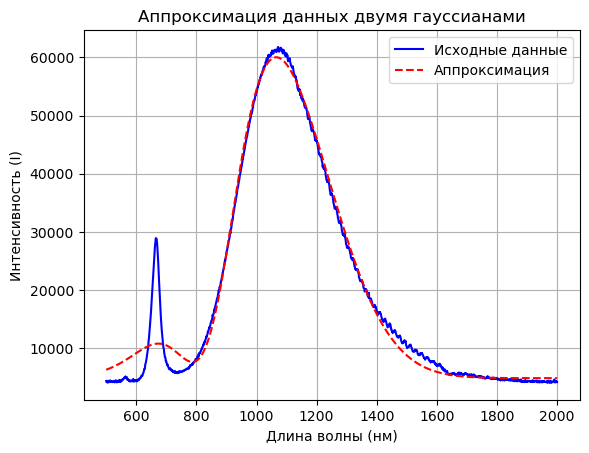

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Функция для двух гауссиан
def double_gaussian(x, A1, B1, C1, A2, B2, C2, D):
    return A1 * np.exp(-(x - B1)**2 / (C1**2)) + A2 * np.exp(-(x - B2)**2 / (C2**2)) + D

# Считываем данные из файла
filename = "data/sp_00000000.sp"
data = {"nm": [], "I": []}
with open(filename, 'r') as file:
    for line in file:
        if line.startswith('#'):
            continue
        values = line.split()
        nm = float(values[0])
        if 500 <= nm <= 2000:  # Ограничиваем диапазон длин волн
            data["nm"].append(nm)
            data["I"].append(float(values[1]))

# Преобразуем данные в массивы NumPy
x_data = np.array(data["nm"])
y_data = np.array(data["I"])

# Начальные значения параметров для аппроксимации, включая ваши предположения для B1 и B2
initial_guess = [max(y_data), 650, 100, max(y_data)/2, 1050, 100, 0]

# Аппроксимация данных двумя гауссианами
popt, pcov = curve_fit(double_gaussian, x_data, y_data, p0=initial_guess)

# Получение параметров гауссиан
A1, B1, C1, A2, B2, C2, D = popt

# Построение графика с аппроксимацией
plt.plot(x_data, y_data, 'b-', label='Исходные данные')
plt.plot(x_data, double_gaussian(x_data, A1, B1, C1, A2, B2, C2, D), 'r--', label='Аппроксимация')
plt.xlabel('Длина волны (нм)')
plt.ylabel('Интенсивность (I)')
plt.title('Аппроксимация данных двумя гауссианами')
plt.legend()
plt.grid(True)
plt.show()


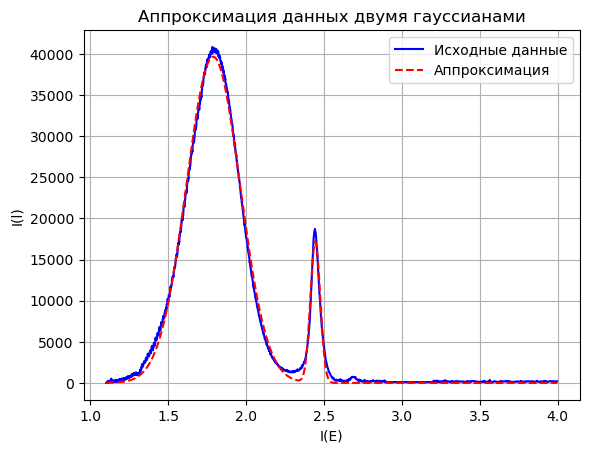

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Функция для двух гауссиан
def double_gaussian(x, A1, B1, C1, A2, B2, C2):
    return A1 * np.exp(-(x - B1)**2 / (C1**2)) + A2 * np.exp(-(x - B2)**2 / (C2**2))

# Считываем данные из файла
filename = "data/sp_00070000.sp"
data = {"E": [], "I(E)": [], "I(l)": []}
with open(filename, 'r') as file:
    for line in file:
        if line.startswith('#'):
            continue
        values = line.split()
        data["I(l)"].append(float(values[1]))
        data["I(E)"].append(float(values[3]))

# Преобразуем данные в массивы NumPy
x_data = np.array(data["I(E)"])
y_data = np.array(data["I(l)"])



# Упорядочиваем x_data
sorted_indices = np.argsort(x_data)
x_data = x_data[sorted_indices]
y_data = y_data[sorted_indices]

# Заменяем значения в y диапазоне по x от 2.9 до 3.2 минимальным значением в этом диапазоне
min_y_value = np.min(y_data[(x_data >= 2.9) & (x_data <= 3.2)])
y_data[(x_data >= 2.9) & (x_data <= 3.2)] = min_y_value

# Ограничиваем x_data до 5
mask = x_data <= 4
x_data = x_data[mask]
y_data = y_data[mask]
y_data = y_data - min(y_data)

# Начальные значения параметров для аппроксимации
initial_guess = [max(y_data), 1.7, 10, max(y_data)/3, 2.45, 0.01]

# Аппроксимация данных двумя гауссианами
popt, pcov = curve_fit(double_gaussian, x_data, y_data, p0=initial_guess)

# Получение параметров гауссиан
A1, B1, C1, A2, B2, C2 = popt

# Построение графика с аппроксимацией
plt.plot(x_data, y_data, 'b-', label='Исходные данные')
plt.plot(x_data, double_gaussian(x_data, A1, B1, C1, A2, B2, C2), 'r--', label='Аппроксимация')
plt.xlabel('I(E)')
plt.ylabel('I(l)')
plt.title('Аппроксимация данных двумя гауссианами')
plt.legend()
plt.grid(True)
plt.savefig('example.pdf')
plt.show()


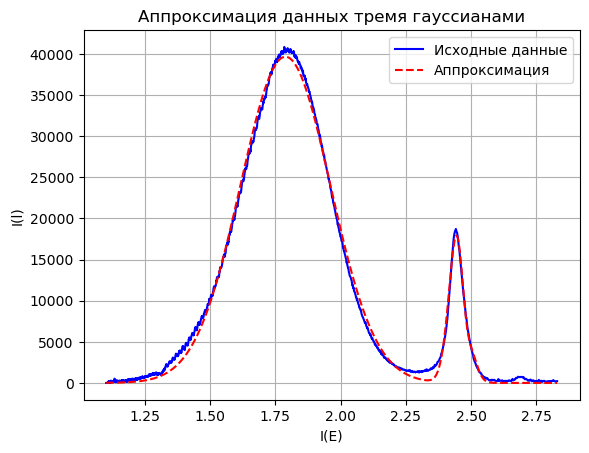

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Функция для двух гауссиан
def double_gaussian(x, A1, B1, C1, A2, B2, C2, A3, B3, C3):
    return A1 * np.exp(-(x - B1)**2 / (C1**2)) + A2 * np.exp(-(x - B2)**2 / (C2**2)) + A3 * np.exp(-(x - B3)**2 / (C3**2))

# Считываем данные из файла
filename = "data/sp_00070000.sp"
data = {"E": [], "I(E)": [], "I(l)": []}
with open(filename, 'r') as file:
    for line in file:
        if line.startswith('#'):
            continue
        values = line.split()
        data["I(l)"].append(float(values[1]))
        data["I(E)"].append(float(values[3]))

# Преобразуем данные в массивы NumPy
x_data = np.array(data["I(E)"])
y_data = np.array(data["I(l)"])



# Упорядочиваем x_data
sorted_indices = np.argsort(x_data)
x_data = x_data[sorted_indices]
y_data = y_data[sorted_indices]

# Заменяем значения в y диапазоне по x от 2.9 до 3.2 минимальным значением в этом диапазоне
min_y_value = np.min(y_data[(x_data >= 2.9) & (x_data <= 3.2)])
y_data[(x_data >= 2.9) & (x_data <= 3.2)] = min_y_value

# Ограничиваем x_data до 5
mask = x_data <= 2.83
x_data = x_data[mask]
y_data = y_data[mask]
y_data = y_data - min(y_data)

# Начальные значения параметров для аппроксимации
initial_guess = [max(y_data), 1.7, 10, max(y_data)/3, 2.45, 0.01, max(y_data)/35, 2.7, 0.03]

# Аппроксимация данных двумя гауссианами
popt, pcov = curve_fit(double_gaussian, x_data, y_data, p0=initial_guess)

# Получение параметров гауссиан
A1, B1, C1, A2, B2, C2, A3, B3, C3 = popt

# Построение графика с аппроксимацией
plt.plot(x_data, y_data, 'b-', label='Исходные данные')
plt.plot(x_data, double_gaussian(x_data, A1, B1, C1, A2, B2, C2, A3, B3, C3), 'r--', label='Аппроксимация')
plt.xlabel('I(E)')
plt.ylabel('I(l)')
plt.title('Аппроксимация данных тремя гауссианами')
plt.legend()
plt.grid(True)
plt.savefig('example3.pdf')
plt.show()


In [15]:
import csv

# Open the log file for reading
with open('sp_log.log', 'r') as file:
    # Read all lines from the file
    lines = file.readlines()

# Initialize lists to store modified lines and integration times
modified_lines = []
integration_times = []

# Iterate through each line in the file
for line in lines:
    # Remove leading and trailing whitespaces
    line = line.strip()
    # Skip empty lines
    if not line:
        continue
    # Split the line into columns based on tab delimiter
    columns = line.split('\t')
    # Check if the line has at least 5 columns
    if len(columns) < 5:
        print("Skipping line: ", line)
        continue
    # Remove "/media/nfs/" from the filename column (index 4)
    columns[4] = columns[4].replace('/media/nfs/', '')
    # Convert integration_time to float and store it in a list
    integration_times.append(float(columns[2]))
    # Append modified line to the list
    modified_lines.append(columns)

# Calculate scale factors
scale_factors = [1]  # Initialize with 1 as the first scale factor
for i in range(1, len(integration_times)):
    scale_factor = integration_times[i] / integration_times[i - 1]
    scale_factors.append(scale_factor)

# Zip modified lines and scale factors together
data = zip(modified_lines, scale_factors)

# Write the result to a CSV file
with open('result.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    # Write header
    writer.writerow(['Index', 'T(K)', 'Integration Time(ns)', 'Maximum', 'Filename', 'Scale Factor'])
    # Write rows
    for line, scale_factor in data:
        writer.writerow(line + [scale_factor])



Skipping line:  # index T(K) integration_time(ns) maximum filename


In [28]:
import pandas as pd
data = pd.read_csv('result.csv')

In [29]:
data[data['Scale Factor'] != 1]

,Index,T(K),Integration Time(ns),Maximum,Filename,Scale Factor
1,1,298.764491,404000,51323,sp_00000001.sp,0.808000
79,79,298.712857,634000,64872,sp_00000079.sp,1.569307
80,80,298.687041,488000,58773,sp_00000080.sp,0.769716
84,84,298.661224,244000,30568,sp_00000084.sp,0.500000
85,85,298.635407,399000,63661,sp_00000085.sp,1.635246
86,86,298.635407,313000,53497,sp_00000086.sp,0.784461
114,114,298.170705,415000,65535,sp_00000114.sp,1.325879
115,115,298.107307,207000,40636,sp_00000115.sp,0.498795
118,118,298.055673,265000,48277,sp_00000118.sp,1.280193
247,247,292.051006,342000,62067,sp_00000247.sp,1.290566


In [30]:
list(data[data['Scale Factor'] != 1].index)

[1, 79, 80, 84, 85, 86, 114, 115, 118, 247, 248, 644, 1320, 47814, 58119]

In [47]:
# Замена значений в диапазоне индексов (47815, 58118) для столбца 'Scale Factor'
data.loc[47814:58118, 'Scale Factor_'] = data.at[47814, 'Scale Factor']

In [49]:
data.loc[40000:47813, 'Scale Factor_'] = 1

In [40]:
data.loc[58119:data.shape[0], 'Scale Factor_'] = data.at[58119, 'Scale Factor'] * data.at[47814, 'Scale Factor']

In [53]:
data_ = data.loc[40000:data.shape[0]]

In [54]:
data_.to_csv('data+.csv')

In [56]:
data = pd.read_csv('data+.csv')
data

,Unnamed: 0,Index,T(K),Integration Time(ns),Maximum,Filename,Scale Factor,Scale Factor_
0,40000,40000,85.104240,189000,44906,sp_00040000.sp,1.0,1.000000
1,40001,40001,85.104240,189000,44914,sp_00040001.sp,1.0,1.000000
2,40002,40002,85.104240,189000,44972,sp_00040002.sp,1.0,1.000000
3,40003,40003,85.104240,189000,44966,sp_00040003.sp,1.0,1.000000
4,40004,40004,85.104240,189000,44944,sp_00040004.sp,1.0,1.000000
...,...,...,...,...,...,...,...,...
33031,73031,73031,270.605904,295000,42295,sp_00073031.sp,1.0,1.560847
33032,73032,73032,270.631720,295000,42157,sp_00073032.sp,1.0,1.560847
33033,73033,73033,270.631720,295000,42157,sp_00073033.sp,1.0,1.560847
33034,73034,73034,270.605904,295000,42077,sp_00073034.sp,1.0,1.560847


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

# Функция для двух гауссиан
def double_gaussian(x, A1, B1, C1, A2, B2, C2):
    return A1 * np.exp(-(x - B1)**2 / (C1**2)) + A2 * np.exp(-(x - B2)**2 / (C2**2))

# Функция для загрузки данных из файла .sp
def load_data(filename):
    data = {"E": [], "I(E)": [], "I(l)": []}
    with open(filename, 'r') as file:
        for line in file:
            if line.startswith('#'):
                continue
            values = line.split()
            data["I(l)"].append(float(values[1]))
            data["I(E)"].append(float(values[3]))
    return data

# Загрузка файла с коэффициентами Scale Factor_
scale_factor_data = pd.read_csv('data+.csv')

# Проход по всем файлам .sp в папке data
directory = 'data'
output_directory = 'output_data'
os.makedirs(output_directory, exist_ok=True)  # Создаем папку для результатов, если ее нет

for filename in os.listdir(directory):
    if filename.endswith(".sp"):
        file_number = int(filename.split("_")[1].split(".")[0])
        if file_number < 73035:
            continue  # Пропустить обработку файлов, номер которых меньше 40000
        
        filepath = os.path.join(directory, filename)
        
        
        # Поиск соответствующего Scale Factor_ для файла .sp
        scale_factor_row = scale_factor_data[scale_factor_data['Filename'] == filename]
        
        # Если строка с коэффициентом Scale Factor_ не найдена, перейти к следующей итерации цикла
        if scale_factor_row.empty:
            print(f"Не найден Scale Factor_ для файла {filename}. Пропускаем его обработку.")
            continue
        
        # Иначе продолжаем обработку файла .sp
        scale_factor = scale_factor_row['Scale Factor_'].values[0]
        
        data = {"E": [], "I(E)": [], "I(l)": []}
        
        with open(filepath, 'r') as file:
            for line in file:
                if line.startswith('#'):
                    continue
                values = line.split()
                data["I(l)"].append(float(values[1]))
                data["I(E)"].append(float(values[3]))

        # Преобразуем данные в массивы NumPy
        x_data = np.array(data["I(E)"])
        y_data = np.array(data["I(l)"])
        
        # Деление y_data на соответствующий Scale Factor_
        y_data = y_data / scale_factor
        
        # Упорядочивание x_data
        sorted_indices = np.argsort(x_data)
        x_data = x_data[sorted_indices]
        y_data = y_data[sorted_indices]
        
        # Замена значений в y диапазоне по x от 2.9 до 3.2 минимальным значением в этом диапазоне
        min_y_value = np.min(y_data[(x_data >= 2.9) & (x_data <= 3.2)])
        y_data[(x_data >= 2.9) & (x_data <= 3.2)] = min_y_value
        
        # Ограничиваем x_data до 4
        mask = x_data <= 4
        x_data = x_data[mask]
        y_data = y_data[mask]
        y_data = y_data - min(y_data)
        
        # Начальные значения параметров для аппроксимации
        initial_guess = [max(y_data), 1.7, 5, max(y_data)*0.4, 2.45, 0.01]
        
        # Аппроксимация данных двумя гауссианами
        popt, pcov = curve_fit(double_gaussian, x_data, y_data, p0=initial_guess)
        
        # Получение параметров гауссиан
        A1, B1, C1, A2, B2, C2 = popt
        
        temp = scale_factor_row['T(K)'].values[0]
        
        # Построение графика с аппроксимацией
        plt.plot(x_data, y_data, 'b-', label='Исходные данные')
        plt.plot(x_data, double_gaussian(x_data, A1, B1, C1, A2, B2, C2), 'r--', label='Аппроксимация')
        plt.xlabel('I(E)')
        plt.ylabel('I(l)')
        plt.title(f'Аппроксимация данных двумя гауссианами ({temp} K)')
        plt.legend()
        plt.grid(True)
        
        # Сохранение графика
        plot_filename = os.path.join(output_directory, f'plot_{filename}.jpg')
        plt.savefig(plot_filename)
        plt.close()  # Закрываем текущий график, чтобы не накапливать их
        
        # Сохранение коэффициентов в новый .csv файл
        coefficients_filename = os.path.join(output_directory, f'coefficients_{filename}.csv')
        coefficients_data = pd.DataFrame({
            'A1': [A1],
            'B1': [B1],
            'C1': [C1],
            'A2': [A2],
            'B2': [B2],
            'C2': [C2]
        })
        coefficients_data.to_csv(coefficients_filename, index=False)


ValueError: invalid literal for int() with base 10: 'dark'

In [6]:
import os
import pandas as pd

# Создаем пустой датафрейм для хранения данных
data_frames = []

# Проходим по всем файлам .csv в папке data
directory = 'output_data'
for filename in os.listdir(directory):
    if filename.startswith("coefficients_") and filename.endswith(".csv"):
        filepath = os.path.join(directory, filename)
        
        # Читаем данные из файла .csv и добавляем их в список датафреймов
        df = pd.read_csv(filepath)
        data_frames.append(df)

# Объединяем все датафреймы в один
result_df = pd.concat(data_frames, ignore_index=True)



In [7]:
result_df

,A1,B1,C1,A2,B2,C2
0,40766.670243,1.832329,0.242219,14509.601990,2.470929,-0.044194
1,40750.334563,1.832395,-0.242188,14523.769709,2.470980,-0.044233
2,40752.380175,1.832317,-0.242102,14518.843162,2.470938,-0.044176
3,40772.963380,1.832326,-0.242224,14507.076815,2.470963,-0.044298
4,40760.665491,1.832378,-0.242099,14501.070953,2.470956,-0.044221
...,...,...,...,...,...,...
33031,24050.492992,1.790072,0.242859,11101.840651,2.440609,0.045353
33032,24021.346810,1.790090,0.242433,11085.750082,2.440607,0.045202
33033,24019.631159,1.790078,0.242491,11055.033872,2.440621,0.045216
33034,24024.991589,1.790130,0.242479,11115.846743,2.440599,0.045035


In [29]:
import os
import pandas as pd

# Создаем пустой список для хранения данных
data = []

# Проходим по всем файлам .sp в папке data
directory = 'data'
for filename in os.listdir(directory):
    if filename.endswith(".sp"):
        file_number = int(filename.split("_")[1].split(".")[0])
        if file_number < 40000:
            continue  # Пропустить файлы, номер которых меньше 40000
        
        filepath = os.path.join(directory, filename)
        
        # Получаем время последней модификации файла
        modification_time = os.path.getmtime(filepath)
        
        # Добавляем данные в список
        data.append({'Filename': filename, 'Modification Time': modification_time})

# Создаем DataFrame из списка данных
df = pd.DataFrame(data)

In [37]:
data['time'] = df['Modification Time'] - df['Modification Time'][0]

In [45]:
data.to_csv('data+.csv', index=False)

In [48]:
# Путь к папке с изображениями
images_directory = 'output_data'

# Собираем все файлы .jpg из папки
image_files = [os.path.join(images_directory, f) for f in os.listdir(images_directory) if f.endswith('.jpg')]

# Сортируем список файлов для правильной последовательности
image_files.sort()

# Создаем список изображений для анимации, обрабатывая каждый сотый кадр
images = [imageio.imread(file) for i, file in enumerate(image_files) if i % 100 == 0]

# Путь к выходному файлу GIF
output_gif = 'output_animation.gif'

# Создаем анимацию GIF
imageio.mimsave(output_gif, images, duration=0.1) 


C:\Users\ivan\AppData\Local\Temp\ipykernel_6748\1406356770.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images = [imageio.imread(file) for i, file in enumerate(image_files) if i % 100 == 0]


In [49]:
data = pd.read_csv('data+.csv')
data

,Index,T(K),Integration Time(ns),Maximum,Filename,Scale Factor,Scale Factor_,A1,B1,C1,A2,B2,C2,time
0,40000,85.104240,189000,44906,sp_00040000.sp,1.0,1.000000,40766.670243,1.832329,0.242219,14509.601990,2.470929,-0.044194,0.0
1,40001,85.104240,189000,44914,sp_00040001.sp,1.0,1.000000,40750.334563,1.832395,-0.242188,14523.769709,2.470980,-0.044233,0.0
2,40002,85.104240,189000,44972,sp_00040002.sp,1.0,1.000000,40752.380175,1.832317,-0.242102,14518.843162,2.470938,-0.044176,1.0
3,40003,85.104240,189000,44966,sp_00040003.sp,1.0,1.000000,40772.963380,1.832326,-0.242224,14507.076815,2.470963,-0.044298,1.0
4,40004,85.104240,189000,44944,sp_00040004.sp,1.0,1.000000,40760.665491,1.832378,-0.242099,14501.070953,2.470956,-0.044221,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33031,73031,270.605904,295000,42295,sp_00073031.sp,1.0,1.560847,24050.492992,1.790072,0.242859,11101.840651,2.440609,0.045353,8512.0
33032,73032,270.631720,295000,42157,sp_00073032.sp,1.0,1.560847,24021.346810,1.790090,0.242433,11085.750082,2.440607,0.045202,8512.0
33033,73033,270.631720,295000,42157,sp_00073033.sp,1.0,1.560847,24019.631159,1.790078,0.242491,11055.033872,2.440621,0.045216,8513.0
33034,73034,270.605904,295000,42077,sp_00073034.sp,1.0,1.560847,24024.991589,1.790130,0.242479,11115.846743,2.440599,0.045035,8513.0
